In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
sheets_data = []
for i in range(1, 7):
    try:
        df = pd.read_excel('C:/Users/ABC/Downloads/marks_dataset.xlsx', sheet_name=i-1)  # 0-indexed
        df['sheet_number'] = i
        print(f"Sheet {i} loaded: {df.shape[0]} rows, {df.shape[1]} columns")
        sheets_data.append(df)
    except Exception as e:
        print(f"Error loading sheet {i}: {e}")

Sheet 1 loaded: 37 rows, 22 columns
Sheet 2 loaded: 31 rows, 22 columns
Sheet 3 loaded: 47 rows, 22 columns
Sheet 4 loaded: 49 rows, 20 columns
Sheet 5 loaded: 54 rows, 26 columns
Sheet 6 loaded: 54 rows, 26 columns


In [3]:
for i in range(1, 7):
    df = pd.read_excel('C:/Users/ABC/Downloads/marks_dataset.xlsx', sheet_name=i-1)
    print(f"\n--- Sheet {i} ({df.shape[1]} columns) ---")
    print(df.columns.tolist())
    print(f"\nFirst few rows:")
    print(df.head(3))


--- Sheet 1 (21 columns) ---
['Unnamed: 0', 'As:1', 'As:2', 'As:3', 'As:4', 'As:5', 'As:6', 'Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'Qz:5', 'Qz:6', 'Qz:7', 'Qz:8', 'S-I:1', 'S-I', 'S-II:1', 'S-II', 'Final:1', 'Final']

First few rows:
   Unnamed: 0   As:1  As:2  As:3  As:4   As:5  As:6  Qz:1  Qz:2  Qz:3  ...  \
0  Weightage:    3.0   3.0   3.0   3.0    3.0   3.0   2.0   2.0   2.0  ...   
1       Total  130.0  70.0  90.0  50.0  120.0  90.0   5.0  15.0  10.0  ...   
2        Sr.#    NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  ...   

   Qz:5  Qz:6  Qz:7  Qz:8  S-I:1   S-I  S-II:1  S-II  Final:1  Final  
0   2.0   2.0   2.0   2.0   15.0  15.0    15.0  15.0     45.0   45.0  
1  10.0   5.0  12.0   2.0   40.0   NaN    40.0   NaN    100.0    NaN  
2   NaN   NaN   NaN   NaN    NaN   NaN     NaN   NaN      NaN    NaN  

[3 rows x 21 columns]

--- Sheet 2 (21 columns) ---
['Unnamed: 0', 'As:1', 'As:2', 'As:3', 'As:4', 'As:5', 'As:6', 'Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'Qz:5', 'Qz:6', 'Qz:7', 'Qz

In [4]:
combined_df = pd.concat(sheets_data, ignore_index=True)
print(f"\nCombined Dataset: {combined_df.shape[0]} rows, {combined_df.shape[1]} columns")


Combined Dataset: 272 rows, 32 columns


In [5]:
if 'Unnamed: 0' in combined_df.columns:
    combined_df = combined_df.drop('Unnamed: 0', axis=1)
    print("Removed 'Unnamed: 0' column")

Removed 'Unnamed: 0' column


In [6]:
empty_rows = combined_df.isnull().all(axis=1).sum()
if empty_rows > 0:
    combined_df = combined_df.dropna(how='all')
    print(f"Removed {empty_rows} completely empty rows")

print(f"\nCleaned Dataset: {combined_df.shape[0]} rows, {combined_df.shape[1]} columns")


Cleaned Dataset: 272 rows, 31 columns


In [7]:
print("\nColumn Names:")
print(combined_df.columns.tolist())

print("\nFirst 5 rows:")
print(combined_df.head())

print("\nData Types:")
print(combined_df.dtypes)

print("\nMissing Values Count:")
missing_counts = combined_df.isnull().sum()
print(missing_counts[missing_counts > 0])

print("\nMissing Values Percentage:")
missing_pct = (combined_df.isnull().sum() / len(combined_df)) * 100
print(missing_pct[missing_pct > 0].round(2))

print("\nBasic Statistics:")
print(combined_df.describe())


Column Names:
['As:1', 'As:2', 'As:3', 'As:4', 'As:5', 'As:6', 'Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'Qz:5', 'Qz:6', 'Qz:7', 'Qz:8', 'S-I:1', 'S-I', 'S-II:1', 'S-II', 'Final:1', 'Final', 'sheet_number', 'Proj:1', 'Proj', 'S-I:2', 'S-I:3', 'S-II:2', 'S-II:3', 'Final:2', 'Final:3', 'Final:4', 'Final:5']

First 5 rows:
    As:1  As:2  As:3  As:4   As:5  As:6  Qz:1  Qz:2  Qz:3  Qz:4  ...  Proj:1  \
0    3.0   3.0   3.0   3.0    3.0   3.0   2.0   2.0   2.0   2.0  ...     NaN   
1  130.0  70.0  90.0  50.0  120.0  90.0   5.0  15.0  10.0  10.0  ...     NaN   
2    NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN  ...     NaN   
3   80.5  60.5  73.5  40.5   59.0  70.5   3.5   5.0   2.0   8.0  ...     NaN   
4   72.5  68.0  39.0  35.0   80.5  71.0   2.5   7.0   0.0  10.0  ...     NaN   

   Proj  S-I:2  S-I:3  S-II:2  S-II:3  Final:2  Final:3  Final:4  Final:5  
0   NaN    NaN    NaN     NaN     NaN      NaN      NaN      NaN      NaN  
1   NaN    NaN    NaN     NaN     NaN      NaN      Na

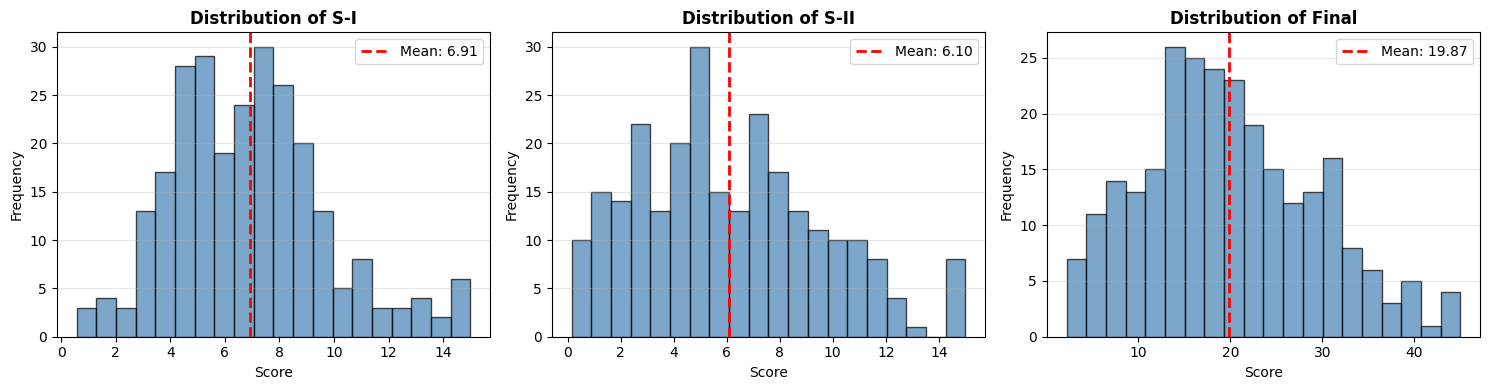

In [8]:
target_cols = ['S-I', 'S-II', 'Final']
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, col in enumerate(target_cols):
    if col in combined_df.columns:
        data = combined_df[col].dropna()
        axes[idx].hist(data, bins=20, edgecolor='black', alpha=0.7, color='steelblue')
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Score', fontsize=10)
        axes[idx].set_ylabel('Frequency', fontsize=10)
        axes[idx].axvline(data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data.mean():.2f}')
        axes[idx].legend()
        axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

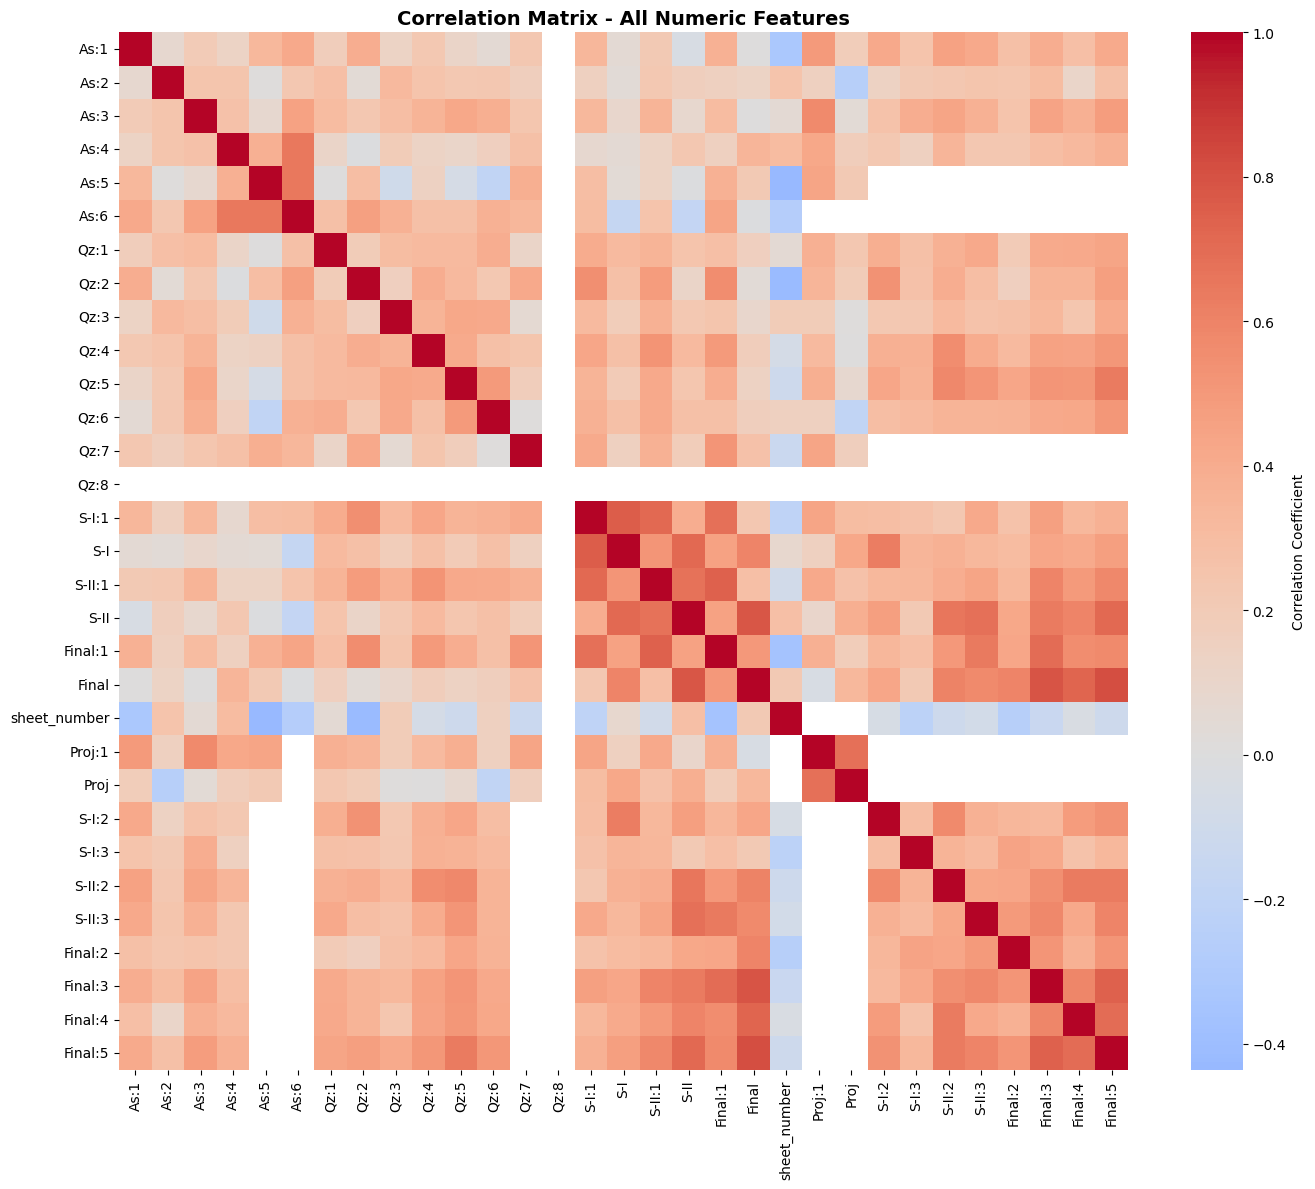

In [9]:
numeric_cols = combined_df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(14, 12))
correlation_matrix = combined_df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=False, fmt='.2f', cmap='coolwarm', center=0, 
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix - All Numeric Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [10]:
df_processed = combined_df.copy()

In [11]:
numeric_features = df_processed.select_dtypes(include=[np.number]).columns.tolist()
if 'sheet_number' in numeric_features:
    numeric_features.remove('sheet_number')

print(f"\nNumeric features to process: {len(numeric_features)} columns")


Numeric features to process: 30 columns


In [12]:
print("\n--- Filling missing values with 0 ---")

for col in numeric_features:
    missing_count = df_processed[col].isnull().sum()
    missing_pct = (missing_count / len(df_processed)) * 100
    
    if missing_count > 0:
        df_processed[col].fillna(0, inplace=True)
        print(f"{col:15s}: {missing_count:4d} missing ({missing_pct:5.2f}%) → filled with 0")

print("\n✓ All missing values filled with 0")
print(f"Missing values remaining: {df_processed.isnull().sum().sum()}")


--- Filling missing values with 0 ---
As:1           :   14 missing ( 5.15%) → filled with 0
As:2           :   13 missing ( 4.78%) → filled with 0
As:3           :   14 missing ( 5.15%) → filled with 0
As:4           :   18 missing ( 6.62%) → filled with 0
As:5           :  123 missing (45.22%) → filled with 0
As:6           :  213 missing (78.31%) → filled with 0
Qz:1           :   12 missing ( 4.41%) → filled with 0
Qz:2           :   12 missing ( 4.41%) → filled with 0
Qz:3           :   11 missing ( 4.04%) → filled with 0
Qz:4           :   16 missing ( 5.88%) → filled with 0
Qz:5           :   24 missing ( 8.82%) → filled with 0
Qz:6           :   35 missing (12.87%) → filled with 0
Qz:7           :  136 missing (50.00%) → filled with 0
Qz:8           :  210 missing (77.21%) → filled with 0
S-I:1          :    6 missing ( 2.21%) → filled with 0
S-I            :   12 missing ( 4.41%) → filled with 0
S-II:1         :    8 missing ( 2.94%) → filled with 0
S-II           :   15 miss

C:\Users\ABC\AppData\Local\Temp\ipykernel_17632\3417974443.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed[col].fillna(0, inplace=True)


In [13]:
all_cols = df_processed.columns.tolist()

In [14]:
def get_columns_by_pattern(df, patterns):
    """Get columns that match any of the given patterns"""
    cols = []
    for col in df.columns:
        for pattern in patterns:
            if pattern in col:
                cols.append(col)
                break
    return cols

In [15]:
assignments = sorted([col for col in all_cols if col.startswith('As:')])
quizzes = sorted([col for col in all_cols if col.startswith('Qz:')])
sessional1_parts = sorted([col for col in all_cols if col.startswith('S-I:') and col != 'S-I'])
sessional2_parts = sorted([col for col in all_cols if col.startswith('S-II:') and col != 'S-II'])
final_parts = sorted([col for col in all_cols if col.startswith('Final:') and col != 'Final'])
projects = sorted([col for col in all_cols if col.startswith('Proj')])

In [16]:
print("\n--- Available Features ---")
print(f"Assignments ({len(assignments)}): {assignments}")
print(f"Quizzes ({len(quizzes)}): {quizzes}")
print(f"S-I components ({len(sessional1_parts)}): {sessional1_parts}")
print(f"S-II components ({len(sessional2_parts)}): {sessional2_parts}")
print(f"Final components ({len(final_parts)}): {final_parts}")
print(f"Projects ({len(projects)}): {projects}")


--- Available Features ---
Assignments (6): ['As:1', 'As:2', 'As:3', 'As:4', 'As:5', 'As:6']
Quizzes (8): ['Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'Qz:5', 'Qz:6', 'Qz:7', 'Qz:8']
S-I components (3): ['S-I:1', 'S-I:2', 'S-I:3']
S-II components (3): ['S-II:1', 'S-II:2', 'S-II:3']
Final components (5): ['Final:1', 'Final:2', 'Final:3', 'Final:4', 'Final:5']
Projects (2): ['Proj', 'Proj:1']


In [17]:
 #RQ1: Predict S-I (Midterm I)
# Can only use assessments that happen BEFORE Midterm I
# Assumption: Assignments and Quizzes come before Midterm I
features_rq1 = ['As:1']+ ['As:2']+  ['Qz:1']+ ['Qz:2']

In [18]:
# RQ2: Predict S-II (Midterm II)
# Can use: Assignments, Quizzes, Midterm I score, S-I components
features_rq2 = ['As:1']+ ['As:2']+ ['As:3']+ ['As:4']+  ['Qz:1']+ ['Qz:2']+ ['Qz:3'] + ['S-I'] + sessional1_parts

In [19]:
# RQ3: Predict Final Exam
# Can use: All previous assessments including both Midterms
features_rq3 = assignments + quizzes + ['S-I'] + sessional1_parts + ['S-II'] + sessional2_parts + projects

In [20]:
features_rq1 = sorted(list(set(features_rq1)))
features_rq2 = sorted(list(set(features_rq2)))
features_rq3 = sorted(list(set(features_rq3)))


In [21]:
# Targets
target_rq1 = 'S-I'
target_rq2 = 'S-II'
target_rq3 = 'Final'

In [22]:
print("\n--- Feature Sets for Each RQ ---")
print(f"\nRQ1 (Predict {target_rq1}):")
print(f"  Features ({len(features_rq1)}): {features_rq1}")

print(f"\nRQ2 (Predict {target_rq2}):")
print(f"  Features ({len(features_rq2)}): {features_rq2}")

print(f"\nRQ3 (Predict {target_rq3}):")
print(f"  Features ({len(features_rq3)}): {features_rq3}")


--- Feature Sets for Each RQ ---

RQ1 (Predict S-I):
  Features (4): ['As:1', 'As:2', 'Qz:1', 'Qz:2']

RQ2 (Predict S-II):
  Features (11): ['As:1', 'As:2', 'As:3', 'As:4', 'Qz:1', 'Qz:2', 'Qz:3', 'S-I', 'S-I:1', 'S-I:2', 'S-I:3']

RQ3 (Predict Final):
  Features (24): ['As:1', 'As:2', 'As:3', 'As:4', 'As:5', 'As:6', 'Proj', 'Proj:1', 'Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'Qz:5', 'Qz:6', 'Qz:7', 'Qz:8', 'S-I', 'S-I:1', 'S-I:2', 'S-I:3', 'S-II', 'S-II:1', 'S-II:2', 'S-II:3']


In [29]:
import pickle

def train_and_evaluate_models(X, y, rq_name, features_used):
    """
    Train multiple models and evaluate them with bootstrapping
    """
    print("\n" + "="*80)
    print(f"TRAINING MODELS FOR {rq_name}")
    print("="*80)
    print(f"Target: {y.name}")
    print(f"Number of features: {len(features_used)}")
    print(f"Dataset size: {len(X)} samples")
    
    # Remove rows with missing target values
    valid_idx = ~y.isnull()
    X = X[valid_idx].copy()
    y = y[valid_idx].copy()
    
    print(f"Valid samples (non-null target): {len(X)}")
    
    if len(X) < 20:
        print("  WARNING: Very small dataset. Results may not be reliable.")
        return None, None
    
    # Split data: 80% train, 20% test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")
    
    # Handle any remaining missing values
    imputer = SimpleImputer(strategy='constant', fill_value=0)
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_imputed)
    X_test_scaled = scaler.transform(X_test_imputed)
    
    # Convert back to DataFrame
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=features_used)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=features_used)
    
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    
    # Initialize results dictionary
    results = {}
 
    # MODEL 1: Multiple Linear Regression
    model1 = LinearRegression()
    model1.fit(X_train_scaled, y_train)
    y_train_pred1 = model1.predict(X_train_scaled)
    y_test_pred1 = model1.predict(X_test_scaled)
    
    results['Multiple Linear Regression'] = {
        'train_mae': mean_absolute_error(y_train, y_train_pred1),
        'test_mae': mean_absolute_error(y_test, y_test_pred1),
        'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred1)),
        'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred1)),
        'train_r2': r2_score(y_train, y_train_pred1),
        'test_r2': r2_score(y_test, y_test_pred1),
        'model': model1
    }
    
    # MODEL 2: Polynomial Regression (degree 2)
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    model2 = LinearRegression()
    model2.fit(X_train_poly, y_train)
    y_train_pred2 = model2.predict(X_train_poly)
    y_test_pred2 = model2.predict(X_test_poly)
    
    results['Polynomial Regression (deg=2)'] = {
        'train_mae': mean_absolute_error(y_train, y_train_pred2),
        'test_mae': mean_absolute_error(y_test, y_test_pred2),
        'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred2)),
        'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred2)),
        'train_r2': r2_score(y_train, y_train_pred2),
        'test_r2': r2_score(y_test, y_test_pred2),
        'model': model2
    }
    
    # MODEL 3: Dummy Regressor
    dummy = DummyRegressor(strategy='mean')
    dummy.fit(X_train_scaled, y_train)
    y_train_pred_dummy = dummy.predict(X_train_scaled)
    y_test_pred_dummy = dummy.predict(X_test_scaled)
    
    results['Dummy Regressor (mean)'] = {
        'train_mae': mean_absolute_error(y_train, y_train_pred_dummy),
        'test_mae': mean_absolute_error(y_test, y_test_pred_dummy),
        'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred_dummy)),
        'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred_dummy)),
        'train_r2': r2_score(y_train, y_train_pred_dummy),
        'test_r2': r2_score(y_test, y_test_pred_dummy),
        'model': dummy
    }
    
    # BOOTSTRAPPING (500 samples on training data only)
    print("\n--- Performing Bootstrapping (500 samples) ---")
    print("This may take a minute...")
    
    n_bootstraps = 500
    bootstrap_maes = {model_name: [] for model_name in results.keys()}
    
    for i in range(n_bootstraps):
        # Sample with replacement from training data
        indices = np.random.choice(len(X_train_scaled), size=len(X_train_scaled), replace=True)
        X_boot = X_train_scaled.iloc[indices]
        y_boot = y_train.iloc[indices]
        
        # Model 1: Multiple Linear Regression
        model_boot = LinearRegression()
        model_boot.fit(X_boot, y_boot)
        y_pred_boot = model_boot.predict(X_boot)
        bootstrap_maes['Multiple Linear Regression'].append(mean_absolute_error(y_boot, y_pred_boot))
        
        # Model 2: Polynomial Regression
        X_boot_poly = poly.transform(X_boot)
        model_boot_poly = LinearRegression()
        model_boot_poly.fit(X_boot_poly, y_boot)
        y_pred_boot_poly = model_boot_poly.predict(X_boot_poly)
        bootstrap_maes['Polynomial Regression (deg=2)'].append(mean_absolute_error(y_boot, y_pred_boot_poly))
        
        # Model 3: Dummy
        dummy_boot = DummyRegressor(strategy='mean')
        dummy_boot.fit(X_boot, y_boot)
        y_pred_boot_dummy = dummy_boot.predict(X_boot)
        bootstrap_maes['Dummy Regressor (mean)'].append(mean_absolute_error(y_boot, y_pred_boot_dummy))
        
        if (i + 1) % 100 == 0:
            print(f"  Completed {i + 1}/{n_bootstraps} bootstrap samples")
    
    # Calculate 95% confidence intervals
    for model_name in results.keys():
        mae_values = bootstrap_maes[model_name]
        ci_lower = np.percentile(mae_values, 2.5)
        ci_upper = np.percentile(mae_values, 97.5)
        results[model_name]['mae_ci_lower'] = ci_lower
        results[model_name]['mae_ci_upper'] = ci_upper
    
    print("✓ Bootstrapping complete!")
    
    # CREATE COMPARISON TABLE
    print("\n" + "="*80)
    print(f"RESULTS SUMMARY FOR {rq_name}")
    print("="*80)
    
    comparison_df = pd.DataFrame({
        'Model': list(results.keys()),
        'Train MAE': [f"{results[m]['train_mae']:.3f}" for m in results.keys()],
        'Test MAE': [f"{results[m]['test_mae']:.3f}" for m in results.keys()],
        'MAE 95% CI': [f"[{results[m]['mae_ci_lower']:.3f}, {results[m]['mae_ci_upper']:.3f}]" for m in results.keys()],
        'Train RMSE': [f"{results[m]['train_rmse']:.3f}" for m in results.keys()],
        'Test RMSE': [f"{results[m]['test_rmse']:.3f}" for m in results.keys()],
        'Train R²': [f"{results[m]['train_r2']:.3f}" for m in results.keys()],
        'Test R²': [f"{results[m]['test_r2']:.3f}" for m in results.keys()]
    })
    
    print("\n", comparison_df.to_string(index=False))
    
    # Find best model (based on test MAE - lower is better)
    best_model_idx = comparison_df['Test MAE'].astype(float).idxmin()
    best_model_name = comparison_df.loc[best_model_idx, 'Model']
    print(f"\n{'*'*80}")
    print(f"*** BEST MODEL: {best_model_name} ***")
    print(f"{'*'*80}")
    
    # Overfitting/Underfitting Analysis
    best_model_results = results[best_model_name]
    train_r2 = best_model_results['train_r2']
    test_r2 = best_model_results['test_r2']
    r2_diff = abs(train_r2 - test_r2)
    
    print(f"\n--- Overfitting/Underfitting Analysis for {best_model_name} ---")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Test R²:  {test_r2:.4f}")
    print(f"Difference: {r2_diff:.4f}")
    
    if train_r2 > 0.9 and test_r2 < 0.7:
        print("  OVERFITTING DETECTED: Model performs much better on training than test data")
    elif r2_diff > 0.15:
        print("  POSSIBLE OVERFITTING: Significant gap between train and test performance")
    elif train_r2 < 0.5 and test_r2 < 0.5:
        print(" UNDERFITTING DETECTED: Model performs poorly on both train and test data")
    else:
        print("Model shows reasonable generalization")
    
    # Interpretation of 95% CI
    print(f"\n--- 95% Confidence Interval Interpretation ---")
    print("We performed 500 bootstrap samples to estimate uncertainty in MAE:")
    for model_name in results.keys():
        ci_lower = results[model_name]['mae_ci_lower']
        ci_upper = results[model_name]['mae_ci_upper']
        ci_width = ci_upper - ci_lower
        print(f"\n{model_name}:")
        print(f"  95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]")
        print(f"  Width: {ci_width:.3f}")
        print(f"  → We are 95% confident the true MAE lies within this range")
    
    # Visualize predictions vs actual for best model
    plt.figure(figsize=(10, 5))
    
    # Get predictions for best model
    if best_model_name == 'Multiple Linear Regression':
        y_test_pred_best = model1.predict(X_test_scaled)
    elif best_model_name == 'Polynomial Regression (deg=2)':
        y_test_pred_best = model2.predict(X_test_poly)
    else:
        y_test_pred_best = dummy.predict(X_test_scaled)
    
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_test_pred_best, alpha=0.6, edgecolors='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Scores', fontsize=11)
    plt.ylabel('Predicted Scores', fontsize=11)
    plt.title(f'{rq_name}: {best_model_name}\nPredictions vs Actual', fontsize=12, fontweight='bold')
    plt.grid(alpha=0.3)
    
    plt.subplot(1, 2, 2)
    residuals = y_test - y_test_pred_best
    plt.scatter(y_test_pred_best, residuals, alpha=0.6, edgecolors='k')
    plt.axhline(y=0, color='r', linestyle='--', lw=2)
    plt.xlabel('Predicted Scores', fontsize=11)
    plt.ylabel('Residuals', fontsize=11)
    plt.title(f'{rq_name}: Residual Plot', fontsize=12, fontweight='bold')
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\n--- Saving trained models with pickle ---")
    for model_name in results.keys():
        file_name = f"model_{rq_name.replace(' ', '_')}_{model_name.replace(' ', '_')}.pkl"
        pickle.dump(results[model_name]['model'], open(file_name, "wb"))
        print(f"Saved {model_name} as {file_name}")
    
    return results, comparison_df



  RESEARCH QUESTION 1: Predicting Midterm I (S-I)


TRAINING MODELS FOR RQ1
Target: S-I
Number of features: 4
Dataset size: 272 samples
Valid samples (non-null target): 272
Train size: 217, Test size: 55

--- Performing Bootstrapping (500 samples) ---
This may take a minute...
  Completed 100/500 bootstrap samples
  Completed 200/500 bootstrap samples
  Completed 300/500 bootstrap samples
  Completed 400/500 bootstrap samples
  Completed 500/500 bootstrap samples
✓ Bootstrapping complete!

RESULTS SUMMARY FOR RQ1

                         Model Train MAE Test MAE     MAE 95% CI Train RMSE Test RMSE Train R² Test R²
   Multiple Linear Regression     2.120    2.460 [1.819, 2.400]      2.889     3.343    0.101  -0.153
Polynomial Regression (deg=2)     2.099    2.439 [1.718, 2.282]      2.719     3.301    0.204  -0.125
       Dummy Regressor (mean)     2.371    2.667 [2.122, 2.611]      3.047     3.395    0.000  -0.190

********************************************************************

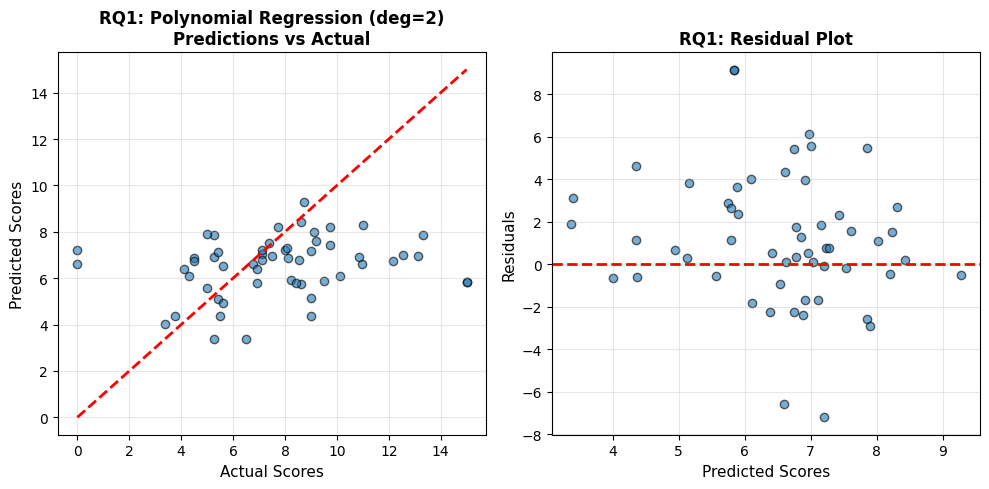


--- Saving trained models with pickle ---
Saved Multiple Linear Regression as model_RQ1_Multiple_Linear_Regression.pkl
Saved Polynomial Regression (deg=2) as model_RQ1_Polynomial_Regression_(deg=2).pkl
Saved Dummy Regressor (mean) as model_RQ1_Dummy_Regressor_(mean).pkl


  RESEARCH QUESTION 2: Predicting Midterm II (S-II)


TRAINING MODELS FOR RQ2
Target: S-II
Number of features: 11
Dataset size: 272 samples
Valid samples (non-null target): 272
Train size: 217, Test size: 55

--- Performing Bootstrapping (500 samples) ---
This may take a minute...
  Completed 100/500 bootstrap samples
  Completed 200/500 bootstrap samples
  Completed 300/500 bootstrap samples
  Completed 400/500 bootstrap samples
  Completed 500/500 bootstrap samples
✓ Bootstrapping complete!

RESULTS SUMMARY FOR RQ2

                         Model Train MAE Test MAE     MAE 95% CI Train RMSE Test RMSE Train R² Test R²
   Multiple Linear Regression     1.767    1.913 [1.537, 1.883]      2.160     2.224    0.649   0.6

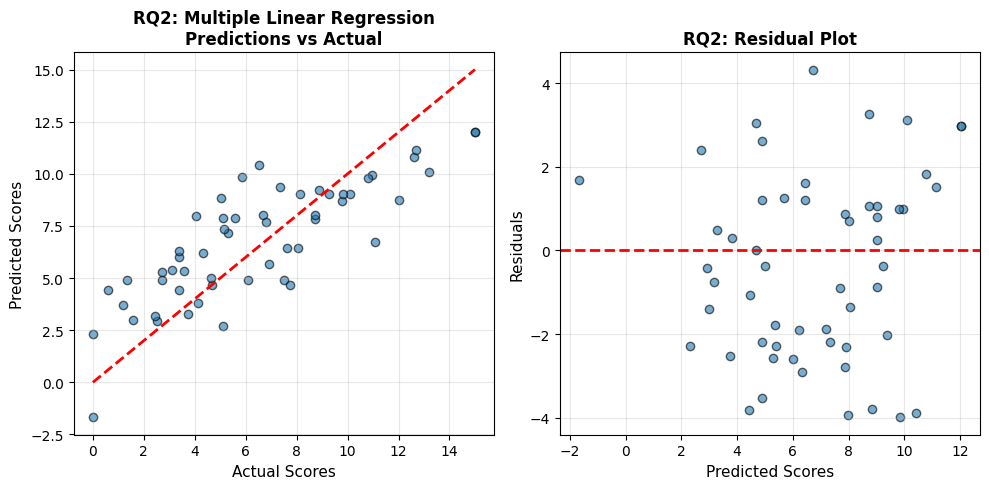


--- Saving trained models with pickle ---
Saved Multiple Linear Regression as model_RQ2_Multiple_Linear_Regression.pkl
Saved Polynomial Regression (deg=2) as model_RQ2_Polynomial_Regression_(deg=2).pkl
Saved Dummy Regressor (mean) as model_RQ2_Dummy_Regressor_(mean).pkl


  RESEARCH QUESTION 3: Predicting Final Exam


TRAINING MODELS FOR RQ3
Target: Final
Number of features: 24
Dataset size: 272 samples
Valid samples (non-null target): 272
Train size: 217, Test size: 55

--- Performing Bootstrapping (500 samples) ---
This may take a minute...
  Completed 100/500 bootstrap samples
  Completed 200/500 bootstrap samples
  Completed 300/500 bootstrap samples
  Completed 400/500 bootstrap samples
  Completed 500/500 bootstrap samples
✓ Bootstrapping complete!

RESULTS SUMMARY FOR RQ3

                         Model Train MAE Test MAE     MAE 95% CI Train RMSE Test RMSE Train R² Test R²
   Multiple Linear Regression     2.774    3.390 [2.248, 2.921]      3.424     4.897    0.884   0.745
Pol

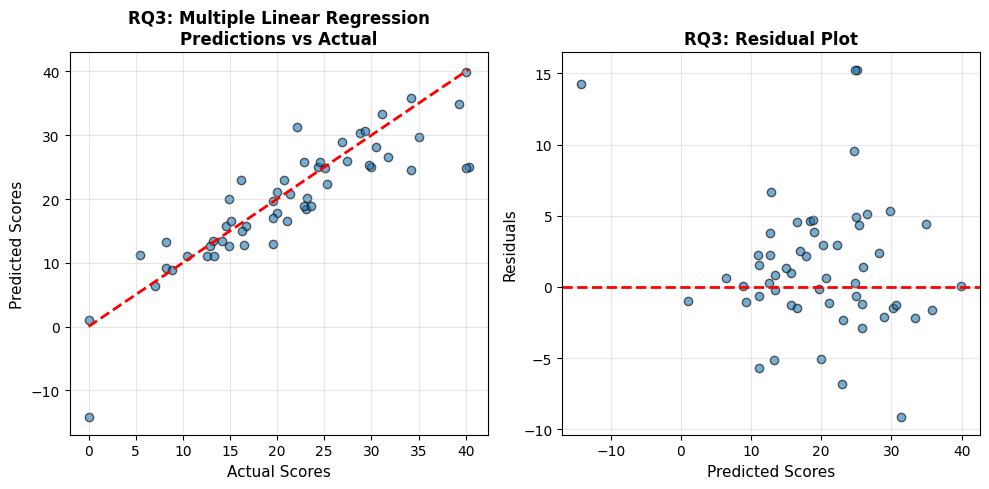


--- Saving trained models with pickle ---
Saved Multiple Linear Regression as model_RQ3_Multiple_Linear_Regression.pkl
Saved Polynomial Regression (deg=2) as model_RQ3_Polynomial_Regression_(deg=2).pkl
Saved Dummy Regressor (mean) as model_RQ3_Dummy_Regressor_(mean).pkl


In [30]:
# Filter features that actually exist in the dataset
def filter_existing_features(features, df):
    """Return only features that exist in the dataframe"""
    return [f for f in features if f in df.columns]

features_rq1_filtered = filter_existing_features(features_rq1, df_processed)
features_rq2_filtered = filter_existing_features(features_rq2, df_processed)
features_rq3_filtered = filter_existing_features(features_rq3, df_processed)

# RQ1: Predict S-I (Midterm I)
if target_rq1 in df_processed.columns and len(features_rq1_filtered) > 0:
    print("\n" + ""*80)
    print("  RESEARCH QUESTION 1: Predicting Midterm I (S-I)")
    print(""*80)
    X_rq1 = df_processed[features_rq1_filtered]
    y_rq1 = df_processed[target_rq1]
    results_rq1, comparison_rq1 = train_and_evaluate_models(X_rq1, y_rq1, "RQ1", features_rq1_filtered)
else:
    print(f"\n  Cannot run RQ1: Target '{target_rq1}' not found or no features available")

# RQ2: Predict S-II (Midterm II)
if target_rq2 in df_processed.columns and len(features_rq2_filtered) > 0:
    print("\n" + ""*80)
    print("  RESEARCH QUESTION 2: Predicting Midterm II (S-II)")
    print(""*80)
    X_rq2 = df_processed[features_rq2_filtered]
    y_rq2 = df_processed[target_rq2]
    results_rq2, comparison_rq2 = train_and_evaluate_models(X_rq2, y_rq2, "RQ2", features_rq2_filtered)
else:
    print(f"\n  Cannot run RQ2: Target '{target_rq2}' not found or no features available")

# RQ3: Predict Final Exam
if target_rq3 in df_processed.columns and len(features_rq3_filtered) > 0:
    print("\n" + ""*80)
    print("  RESEARCH QUESTION 3: Predicting Final Exam")
    print(""*80)
    X_rq3 = df_processed[features_rq3_filtered]
    y_rq3 = df_processed[target_rq3]
    results_rq3, comparison_rq3 = train_and_evaluate_models(X_rq3, y_rq3, "RQ3", features_rq3_filtered)
else:
    print(f"\n  Cannot run RQ3: Target '{target_rq3}' not found or no features available")

In [31]:
# ============================================
# RQ1: Predicting Midterm I (S-I)
# ============================================
# Best model: Polynomial Regression (deg=2)
# Train MAE: 2.099, Test MAE: 2.439
# Train R²: 0.204, Test R²: -0.125
# Interpretation:
# - Model error ~2.4 marks on test data (moderate accuracy)
# - Low R² → model explains very little variance
# - Possible overfitting, but overall weak predictive power
# - More features may improve predictions

# ============================================
# RQ2: Predicting Midterm II (S-II)
# ============================================
# Best model: Multiple Linear Regression
# Train MAE: 1.767, Test MAE: 1.913
# Train R²: 0.649, Test R²: 0.647
# Interpretation:
# - Error ~1.9 marks (good accuracy)
# - R² ~0.65 → model explains ~65% of variance
# - Train and test performance similar → model generalizes well
# - Including S-I improves predictions

# ============================================
# RQ3: Predicting Final Exam
# ============================================
# Best model: Multiple Linear Regression
# Train MAE: 2.774, Test MAE: 3.390
# Train R²: 0.884, Test R²: 0.745
# Interpretation:
# - Error ~3.4 marks (reasonably accurate)
# - R² ~0.75 → strong predictive power
# - Mild overfitting, but model generalizes well
# - Polynomial regression overfits badly and fails


In [32]:
# =========================
# Save Predictions for All RQs
# =========================

# RQ1: Polynomial Regression (deg=2) - best model
# Use the scaled & transformed features from training
X_rq1_scaled = results_rq1['Polynomial Regression (deg=2)']['model'].__dict__.get('X_train_', None)
# If not stored, transform manually (use same imputer, scaler, poly as in training)
poly_rq1 = PolynomialFeatures(degree=2, include_bias=False)
X_rq1_scaled = StandardScaler().fit_transform(SimpleImputer(strategy='constant', fill_value=0).fit_transform(X_rq1))
X_rq1_poly = poly_rq1.fit_transform(X_rq1_scaled)
y_pred_rq1 = results_rq1['Polynomial Regression (deg=2)']['model'].predict(X_rq1_poly)
pd.DataFrame({'Actual': y_rq1, 'Predicted': y_pred_rq1}).to_csv("preds_rq1.csv", index=False)

# RQ2: Multiple Linear Regression - best model
X_rq2_scaled = StandardScaler().fit_transform(SimpleImputer(strategy='constant', fill_value=0).fit_transform(X_rq2))
y_pred_rq2 = results_rq2['Multiple Linear Regression']['model'].predict(X_rq2_scaled)
pd.DataFrame({'Actual': y_rq2, 'Predicted': y_pred_rq2}).to_csv("preds_rq2.csv", index=False)

# RQ3: Multiple Linear Regression - best model
X_rq3_scaled = StandardScaler().fit_transform(SimpleImputer(strategy='constant', fill_value=0).fit_transform(X_rq3))
y_pred_rq3 = results_rq3['Multiple Linear Regression']['model'].predict(X_rq3_scaled)
pd.DataFrame({'Actual': y_rq3, 'Predicted': y_pred_rq3}).to_csv("preds_rq3.csv", index=False)

print("Predictions saved for RQ1, RQ2, and RQ3")


Predictions saved for RQ1, RQ2, and RQ3


C:\Users\ABC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ABC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


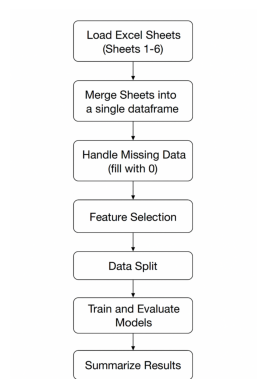

In [33]:
import matplotlib.image as mpimg
img = mpimg.imread('C:/Users/ABC/Downloads/my_image.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [35]:
import pickle

model_rq3_linear = pickle.load(open("model_RQ3_Multiple_Linear_Regression.pkl", "rb"))
model_rq3_poly = pickle.load(open("model_RQ3_Polynomial_Regression_(deg=2).pkl", "rb"))
model_rq3_dummy = pickle.load(open("model_RQ3_Dummy_Regressor_(mean).pkl", "rb"))